(matsuyama)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Globalization and Cycles

```{contents} Contents
:depth: 2
```

## Overview

In this lecture, we review the paper [Globalization and Synchronization of Innovation Cycles](http://www.centreformacroeconomics.ac.uk/Discussion-Papers/2015/CFMDP2015-27-Paper.pdf) by [Kiminori Matsuyama](http://faculty.wcas.northwestern.edu/~kmatsu/), [Laura Gardini](http://www.mdef.it/index.php?id=32) and [Iryna Sushko](http://irynasushko.altervista.org/).

This model helps us understand several interesting stylized facts about the world economy.

One of these is synchronized business cycles across different countries.

Most existing models that generate synchronized business cycles do so by assumption, since they tie output in each country to a common shock.

They also fail to explain certain features of the data, such as the fact that the degree of synchronization tends to increase with trade ties.

By contrast, in the model we consider in this lecture, synchronization is both endogenous and increasing with the extent of trade integration.

In particular, as trade costs fall and international competition increases, innovation incentives become aligned and countries synchronize their innovation cycles.

Let's start with some imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numba import jit, vectorize
from ipywidgets import interact

### Background

The model builds on work by Judd {cite}`Judd1985`, Deneckner and Judd {cite}`Deneckere1992` and Helpman and Krugman {cite}`Helpman1985` by developing a two-country model with trade and innovation.

On the technical side, the paper introduces the concept of [coupled oscillators](https://en.wikipedia.org/wiki/Oscillation#Coupled_oscillations) to economic modeling.

As we will see, coupled oscillators arise endogenously within the model.

Below we review the model and replicate some of the results on synchronization of innovation across countries.

## Key Ideas

It is helpful to begin with an overview of the mechanism.

### Innovation Cycles

As discussed above, two countries produce and trade with each other.

In each country, firms innovate, producing new varieties of goods and, in doing so, receiving temporary monopoly power.

Imitators follow and, after one period of monopoly, what had previously been new varieties now enter competitive production.

Firms have incentives to innovate and produce new goods when the mass of varieties of goods currently in production is relatively low.

In addition, there are strategic complementarities in the timing of innovation.

Firms have incentives to innovate in the same period, so as to avoid competing with substitutes that are competitively produced.

This leads to temporal clustering in innovations in each country.

After a burst of innovation, the mass of goods currently in production increases.

However, goods also become obsolete, so that not all survive from period to period.

This mechanism generates a cycle, where the mass of varieties increases through simultaneous innovation and then falls through obsolescence.

### Synchronization

In the absence of trade, the timing of innovation cycles in each country is decoupled.

This will be the case when trade costs are prohibitively high.

If trade costs fall, then goods produced in each country penetrate each other's markets.

As illustrated below, this leads to synchronization of business cycles across the two countries.

## Model

Let's write down the model more formally.

(The treatment is relatively terse since full details can be found in [the original paper](http://www.centreformacroeconomics.ac.uk/Discussion-Papers/2015/CFMDP2015-27-Paper.pdf))

Time is discrete with $t = 0, 1, \dots$.

There are two countries indexed by $j$ or $k$.

In each country, a representative household inelastically supplies $L_j$ units of labor at wage rate $w_{j, t}$.

Without loss of generality, it is assumed that $L_{1} \geq L_{2}$.

Households consume a single nontradeable final good which is produced competitively.

Its production involves combining two types of tradeable intermediate inputs
via

$$
Y_{k, t} = C_{k, t} = \left( \frac{X^o_{k, t}}{1 - \alpha} \right)^{1-\alpha} \left( \frac{X_{k, t}}{\alpha} \right)^{\alpha}
$$

Here $X^o_{k, t}$ is a homogeneous input which can be produced from labor using a linear, one-for-one technology.

It is freely tradeable, competitively supplied, and homogeneous across countries.

By choosing the price of this good as numeraire and assuming both countries find it optimal to always produce the homogeneous good, we can set $w_{1, t} = w_{2, t} = 1$.

The good $X_{k, t}$ is a composite, built from many differentiated goods via

$$
X_{k, t}^{1 - \frac{1}{\sigma}} = \int_{\Omega_t} \left[ x_{k, t}(\nu) \right]^{1 - \frac{1}{\sigma}} d \nu
$$

Here $x_{k, t}(\nu)$ is the total amount of a differentiated good $\nu \in \Omega_t$ that is produced.

The parameter $\sigma > 1$ is the direct partial elasticity of substitution between a pair of varieties and $\Omega_t$ is the set of varieties available in period
$t$.

We can split the varieties into those which are supplied competitively and those supplied monopolistically; that is, $\Omega_t = \Omega_t^c + \Omega_t^m$.

### Prices

Demand for differentiated inputs is

$$
x_{k, t}(\nu) = \left( \frac{p_{k, t}(\nu)}{P_{k, t}} \right)^{-\sigma} \frac{\alpha  L_k}{P_{k, t}}
$$

Here

* $p_{k, t}(\nu)$ is the price of the variety $\nu$ and
* $P_{k, t}$ is the price index for differentiated inputs in $k$,
  defined by

$$
\left[ P_{k, t} \right]^{1 - \sigma} = \int_{\Omega_t} [p_{k, t}(\nu) ]^{1-\sigma} d\nu
$$

The price of a variety also depends on the origin, $j$, and destination, $k$, of the goods because shipping
varieties between countries incurs an iceberg trade cost
$\tau_{j,k}$.

Thus the effective price in country $k$ of a variety $\nu$ produced in country $j$ becomes $p_{k, t}(\nu) = \tau_{j,k} \, p_{j, t}(\nu)$.

Using these expressions, we can derive the total demand for each variety,
which is

$$
D_{j, t}(\nu) = \sum_k \tau_{j, k} x_{k, t}(\nu) = \alpha A_{j, t}(p_{j, t}(\nu))^{-\sigma}
$$

where

$$
A_{j, t} := \sum_k \frac{\rho_{j, k}  L_{k}}{(P_{k, t})^{1 - \sigma}}
\quad \text{and} \quad
\rho_{j, k} = (\tau_{j, k})^{1 - \sigma} \leq 1
$$

It is assumed that $\tau_{1,1} = \tau_{2,2} = 1$ and $\tau_{1,2} = \tau_{2,1} = \tau$ for some $\tau > 1$, so that

$$
\rho_{1,2} = \rho_{2,1} = \rho := \tau^{1 - \sigma} < 1
$$

The value $\rho \in [0, 1)$ is a proxy for the degree of globalization.

Producing one unit of each differentiated variety requires $\psi$ units of labor, so the marginal cost is equal to $\psi$ for $\nu \in \Omega_{j, t}$.

Additionally, all competitive varieties will have the same price (because of equal marginal cost), which means that, for all $\nu \in \Omega^c$,

$$
p_{j, t}(\nu) = p_{j, t}^c := \psi
\quad \text{and} \quad
D_{j, t} = y_{j, t}^c := \alpha A_{j, t} (p_{j, t}^c)^{-\sigma}
$$

Monopolists will have the same marked-up price, so, for all $\nu \in \Omega^m$ ,

$$
p_{j, t}(\nu) = p_{j, t}^m := \frac{\psi }{1 - \frac{1}{\sigma}}
\quad \text{and} \quad
D_{j, t} = y_{j, t}^m  := \alpha A_{j, t} (p_{j, t}^m)^{-\sigma}
$$

Define

$$
\theta
:= \frac{p_{j, t}^c}{p_{j, t}^m} \frac{y_{j, t}^c}{y_{j, t}^m}
= \left(1 - \frac{1}{\sigma} \right)^{1-\sigma}
$$

Using the preceding definitions and some algebra, the price indices can now be rewritten as

$$
\left(\frac{P_{k,t}}{\psi}\right)^{1-\sigma} = M_{k,t}  + \rho M_{j,t}
\quad \text{where} \quad
M_{j,t} := N_{j,t}^c + \frac{N_{j,t}^m}{ \theta}
$$

The symbols $N_{j, t}^c$ and $N_{j, t}^m$ will denote the measures of $\Omega^c$ and $\Omega^m$ respectively.

### New Varieties

To introduce a new variety, a firm must hire $f$ units of labor per variety in each country.

Monopolist profits must be less than or equal to zero in expectation, so

$$
N_{j,t}^m \geq 0, \quad
\pi_{j, t}^m := (p_{j, t}^m - \psi) y_{j, t}^m - f \leq 0
\quad \text{and} \quad
\pi_{j, t}^m N_{j,t}^m = 0
$$

With further manipulations, this becomes

$$
N_{j,t}^m = \theta(M_{j,t} - N_{j,t}^c) \geq 0,
\quad
\frac{1}{\sigma}
\left[
    \frac{\alpha L_j}{\theta(M_{j,t} + \rho M_{k,t})} +
    \frac{\alpha L_k}{\theta(M_{j,t} + M_{k,t} / \rho)}
\right]
\leq f
$$

### Law of Motion

With $\delta$ as the exogenous probability of a variety becoming obsolete,
the dynamic equation for the measure of firms becomes

$$
N_{j, t+1}^c = \delta (N_{j, t}^c + N_{j, t}^m) = \delta (N_{j, t}^c + \theta(M_{j, t} - N_{j, t}^c))
$$

We will work with a normalized measure of varieties

$$
n_{j, t} := \frac{\theta \sigma f N_{j, t}^c}{\alpha (L_1 + L_2)},
\quad
i_{j, t} := \frac{\theta \sigma f N_{j, t}^m}{\alpha (L_1 + L_2)},
\quad
m_{j, t} := \frac{\theta \sigma f M_{j, t}}{\alpha (L_1 + L_2)} = n_{j, t} + \frac{i_{j, t}}{\theta}
$$

We also use $s_j := \frac{L_j}{L_1 + L_2}$ to be the share of labor employed in country $j$.

We can use these definitions and the preceding expressions to obtain a law of
motion for $n_t := (n_{1, t}, n_{2, t})$.

In particular, given an initial condition, $n_0 = (n_{1, 0}, n_{2, 0}) \in \mathbb{R}_{+}^{2}$, the equilibrium trajectory, $\{ n_t \}_{t=0}^{\infty} = \{ (n_{1, t}, n_{2, t}) \}_{t=0}^{\infty}$, is obtained by iterating on $n_{t+1} = F(n_t)$ where $F : \mathbb{R}_{+}^{2} \rightarrow \mathbb{R}_{+}^{2}$ is given by

$$
\begin{aligned}
  F(n_t)
  &=
  \begin{cases}
      \big( \delta (\theta s_1(\rho) + (1-\theta) n_{1, t}), \delta (\theta s_2(\rho) + (1-\theta) n_{2, t}) \big) \; & \text{for } n_t \in D_{LL} \\
      \big( \delta n_{1, t}, \delta n_{2, t} \big) \; &\text{for } n_t \in D_{HH}  \\
      \big( \delta n_{1, t}, \delta (\theta h_2(n_{1, t}) + (1-\theta) n_{2, t}) \big) &\text{for } n_t \in D_{HL}  \\
      \big( \delta (\theta h_1(n_{2, t}) + (1-\theta) n_{1, t}, \delta n_{2, t}) \big) &\text{for } n_t \in D_{LH}
  \end{cases}
\end{aligned}
$$

Here

$$
\begin{aligned}
      D_{LL} & := \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_j \leq s_j(\rho) \} \\
      D_{HH} & := \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_j \geq h_j(n_k) \} \\
      D_{HL} & :=  \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_1 \geq s_1(\rho) \text{ and } n_2 \leq h_2(n_1) \} \\
      D_{LH} & :=  \{ (n_1, n_2) \in \mathbb{R}_{+}^{2} | n_1 \leq h_1(n_2) \text{ and } n_2 \geq s_2(\rho) \}
\end{aligned}
$$

while

$$
s_1(\rho) = 1 - s_2(\rho)
= \min \left\{ \frac{s_1 - \rho s_2}{1 - \rho}, 1 \right\}
$$

and $h_j(n_k)$ is defined implicitly by the equation

$$
1 = \frac{s_j}{h_j(n_k) + \rho n_k} + \frac{s_k}{h_j(n_k) + n_k / \rho}
$$

Rewriting the equation above gives us a quadratic equation in terms of $h_j(n_k)$.

Since we know $h_j(n_k) > 0$ then we can just solve the quadratic equation and return the positive root.

This gives us

$$
h_j(n_k)^2 + \left( (\rho + \frac{1}{\rho}) n_k - s_j - s_k \right) h_j(n_k) + (n_k^2 - \frac{s_j n_k}{\rho} - s_k n_k \rho) = 0
$$

## Simulation

Let's try simulating some of these trajectories.

We will focus in particular on whether or not innovation cycles synchronize
across the two countries.

As we will see, this depends on initial conditions.

For some parameterizations, synchronization will occur for "most" initial conditions, while for others synchronization will be rare.

The computational burden of testing synchronization across many initial
conditions is not trivial.

In order to make our code fast, we will use just in time compiled functions that will get called and handled by our class.

These are the `@jit` statements that you see below (review [this lecture](https://python-programming.quantecon.org/numba.html) if you don't recall how to use JIT compilation).

Here's the main body of code

In [2]:
@jit(nopython=True)
def _hj(j, nk, s1, s2, θ, δ, ρ):
    """
    If we expand the implicit function for h_j(n_k) then we find that
    it is quadratic. We know that h_j(n_k) > 0 so we can get its
    value by using the quadratic form
    """
    # Find out who's h we are evaluating
    if j == 1:
        sj = s1
        sk = s2
    else:
        sj = s2
        sk = s1

    # Coefficients on the quadratic a x^2 + b x + c = 0
    a = 1.0
    b = ((ρ + 1 / ρ) * nk - sj - sk)
    c = (nk * nk - (sj * nk) / ρ - sk * ρ * nk)

    # Positive solution of quadratic form
    root = (-b + np.sqrt(b * b - 4 * a * c)) / (2 * a)

    return root

@jit(nopython=True)
def DLL(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
    "Determine whether (n1, n2) is in the set DLL"
    return (n1 <= s1_ρ) and (n2 <= s2_ρ)

@jit(nopython=True)
def DHH(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
    "Determine whether (n1, n2) is in the set DHH"
    return (n1 >= _hj(1, n2, s1, s2, θ, δ, ρ)) and \
           (n2 >= _hj(2, n1, s1, s2, θ, δ, ρ))

@jit(nopython=True)
def DHL(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
    "Determine whether (n1, n2) is in the set DHL"
    return (n1 >= s1_ρ) and (n2 <= _hj(2, n1, s1, s2, θ, δ, ρ))

@jit(nopython=True)
def DLH(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
    "Determine whether (n1, n2) is in the set DLH"
    return (n1 <= _hj(1, n2, s1, s2, θ, δ, ρ)) and (n2 >= s2_ρ)

@jit(nopython=True)
def one_step(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
    """
    Takes a current value for (n_{1, t}, n_{2, t}) and returns the
    values (n_{1, t+1}, n_{2, t+1}) according to the law of motion.
    """
    # Depending on where we are, evaluate the right branch
    if DLL(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
        n1_tp1 = δ * (θ * s1_ρ + (1 - θ) * n1)
        n2_tp1 = δ * (θ * s2_ρ + (1 - θ) * n2)
    elif DHH(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
        n1_tp1 = δ * n1
        n2_tp1 = δ * n2
    elif DHL(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
        n1_tp1 = δ * n1
        n2_tp1 = δ * (θ * _hj(2, n1, s1, s2, θ, δ, ρ) + (1 - θ) * n2)
    elif DLH(n1, n2, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
        n1_tp1 = δ * (θ * _hj(1, n2, s1, s2, θ, δ, ρ) + (1 - θ) * n1)
        n2_tp1 = δ * n2

    return n1_tp1, n2_tp1

@jit(nopython=True)
def n_generator(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ):
    """
    Given an initial condition, continues to yield new values of
    n1 and n2
    """
    n1_t, n2_t = n1_0, n2_0
    while True:
        n1_tp1, n2_tp1 = one_step(n1_t, n2_t, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)
        yield (n1_tp1, n2_tp1)
        n1_t, n2_t = n1_tp1, n2_tp1

@jit(nopython=True)
def _pers_till_sync(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ, maxiter, npers):
    """
    Takes initial values and iterates forward to see whether
    the histories eventually end up in sync.

    If countries are symmetric then as soon as the two countries have the
    same measure of firms then they will be synchronized -- However, if
    they are not symmetric then it is possible they have the same measure
    of firms but are not yet synchronized. To address this, we check whether
    firms stay synchronized for `npers` periods with Euclidean norm

    Parameters
    ----------
    n1_0 : scalar(Float)
        Initial normalized measure of firms in country one
    n2_0 : scalar(Float)
        Initial normalized measure of firms in country two
    maxiter : scalar(Int)
        Maximum number of periods to simulate
    npers : scalar(Int)
        Number of periods we would like the countries to have the
        same measure for

    Returns
    -------
    synchronized : scalar(Bool)
        Did the two economies end up synchronized
    pers_2_sync : scalar(Int)
        The number of periods required until they synchronized
    """
    # Initialize the status of synchronization
    synchronized = False
    pers_2_sync = maxiter
    iters = 0

    # Initialize generator
    n_gen = n_generator(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)

    # Will use a counter to determine how many times in a row
    # the firm measures are the same
    nsync = 0

    while (not synchronized) and (iters < maxiter):
        # Increment the number of iterations and get next values
        iters += 1
        n1_t, n2_t = next(n_gen)

        # Check whether same in this period
        if abs(n1_t - n2_t) < 1e-8:
            nsync += 1
        # If not, then reset the nsync counter
        else:
            nsync = 0

        # If we have been in sync for npers then stop and countries
        # became synchronized nsync periods ago
        if nsync > npers:
            synchronized = True
            pers_2_sync = iters - nsync

    return synchronized, pers_2_sync

@jit(nopython=True)
def _create_attraction_basis(s1_ρ, s2_ρ, s1, s2, θ, δ, ρ,
        maxiter, npers, npts):
    # Create unit range with npts
    synchronized, pers_2_sync = False, 0
    unit_range = np.linspace(0.0, 1.0, npts)

    # Allocate space to store time to sync
    time_2_sync = np.empty((npts, npts))
    # Iterate over initial conditions
    for (i, n1_0) in enumerate(unit_range):
        for (j, n2_0) in enumerate(unit_range):
            synchronized, pers_2_sync = _pers_till_sync(n1_0, n2_0, s1_ρ,
                                                        s2_ρ, s1, s2, θ, δ,
                                                        ρ, maxiter, npers)
            time_2_sync[i, j] = pers_2_sync

    return time_2_sync


# == Now we define a class for the model == #

class MSGSync:
    """
    The paper "Globalization and Synchronization of Innovation Cycles" presents
    a two-country model with endogenous innovation cycles. Combines elements
    from Deneckere Judd (1985) and Helpman Krugman (1985) to allow for a
    model with trade that has firms who can introduce new varieties into
    the economy.

    We focus on being able to determine whether the two countries eventually
    synchronize their innovation cycles. To do this, we only need a few
    of the many parameters. In particular, we need the parameters listed
    below

    Parameters
    ----------
    s1 : scalar(Float)
        Amount of total labor in country 1 relative to total worldwide labor
    θ : scalar(Float)
        A measure of how much more of the competitive variety is used in
        production of final goods
    δ : scalar(Float)
        Percentage of firms that are not exogenously destroyed every period
    ρ : scalar(Float)
        Measure of how expensive it is to trade between countries
    """
    def __init__(self, s1=0.5, θ=2.5, δ=0.7, ρ=0.2):
        # Store model parameters
        self.s1, self.θ, self.δ, self.ρ = s1, θ, δ, ρ

        # Store other cutoffs and parameters we use
        self.s2 = 1 - s1
        self.s1_ρ = self._calc_s1_ρ()
        self.s2_ρ = 1 - self.s1_ρ

    def _unpack_params(self):
        return self.s1, self.s2, self.θ, self.δ, self.ρ

    def _calc_s1_ρ(self):
        # Unpack params
        s1, s2, θ, δ, ρ = self._unpack_params()

        # s_1(ρ) = min(val, 1)
        val = (s1 - ρ * s2) / (1 - ρ)
        return min(val, 1)

    def simulate_n(self, n1_0, n2_0, T):
        """
        Simulates the values of (n1, n2) for T periods

        Parameters
        ----------
        n1_0 : scalar(Float)
            Initial normalized measure of firms in country one
        n2_0 : scalar(Float)
            Initial normalized measure of firms in country two
        T : scalar(Int)
            Number of periods to simulate

        Returns
        -------
        n1 : Array(Float64, ndim=1)
            A history of normalized measures of firms in country one
        n2 : Array(Float64, ndim=1)
            A history of normalized measures of firms in country two
        """
        # Unpack parameters
        s1, s2, θ, δ, ρ = self._unpack_params()
        s1_ρ, s2_ρ = self.s1_ρ, self.s2_ρ

        # Allocate space
        n1 = np.empty(T)
        n2 = np.empty(T)

        # Create the generator
        n1[0], n2[0] = n1_0, n2_0
        n_gen = n_generator(n1_0, n2_0, s1_ρ, s2_ρ, s1, s2, θ, δ, ρ)

        # Simulate for T periods
        for t in range(1, T):
            # Get next values
            n1_tp1, n2_tp1 = next(n_gen)

            # Store in arrays
            n1[t] = n1_tp1
            n2[t] = n2_tp1

        return n1, n2

    def pers_till_sync(self, n1_0, n2_0, maxiter=500, npers=3):
        """
        Takes initial values and iterates forward to see whether
        the histories eventually end up in sync.

        If countries are symmetric then as soon as the two countries have the
        same measure of firms then they will be synchronized -- However, if
        they are not symmetric then it is possible they have the same measure
        of firms but are not yet synchronized. To address this, we check whether
        firms stay synchronized for `npers` periods with Euclidean norm

        Parameters
        ----------
        n1_0 : scalar(Float)
            Initial normalized measure of firms in country one
        n2_0 : scalar(Float)
            Initial normalized measure of firms in country two
        maxiter : scalar(Int)
            Maximum number of periods to simulate
        npers : scalar(Int)
            Number of periods we would like the countries to have the
            same measure for

        Returns
        -------
        synchronized : scalar(Bool)
            Did the two economies end up synchronized
        pers_2_sync : scalar(Int)
            The number of periods required until they synchronized
        """
        # Unpack parameters
        s1, s2, θ, δ, ρ = self._unpack_params()
        s1_ρ, s2_ρ = self.s1_ρ, self.s2_ρ

        return _pers_till_sync(n1_0, n2_0, s1_ρ, s2_ρ,
                              s1, s2, θ, δ, ρ, maxiter, npers)

    def create_attraction_basis(self, maxiter=250, npers=3, npts=50):
        """
        Creates an attraction basis for values of n on [0, 1] X [0, 1]
        with npts in each dimension
        """
        # Unpack parameters
        s1, s2, θ, δ, ρ = self._unpack_params()
        s1_ρ, s2_ρ = self.s1_ρ, self.s2_ρ

        ab = _create_attraction_basis(s1_ρ, s2_ρ, s1, s2, θ, δ,
                                    ρ, maxiter, npers, npts)

        return ab

### Time Series of Firm Measures

We write a short function below that exploits the preceding code and plots two time series.

Each time series gives the dynamics for the two countries.

The time series share parameters but differ in their initial condition.

Here's the function

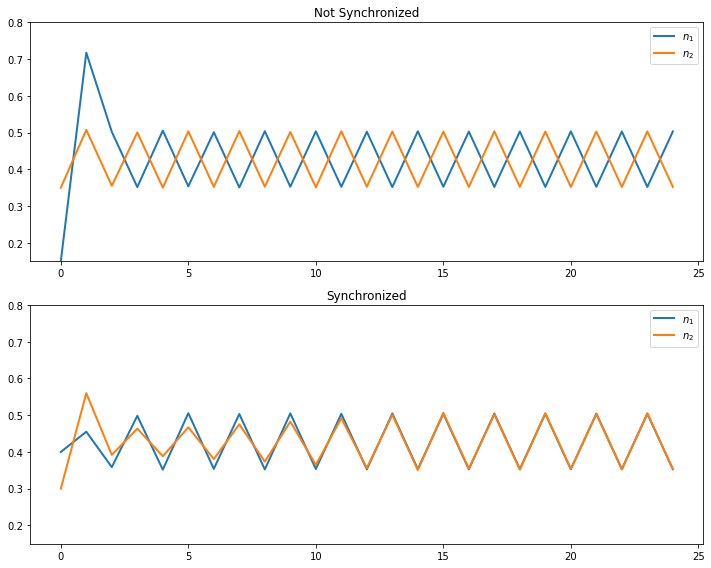

In [3]:
def plot_timeseries(n1_0, n2_0, s1=0.5, θ=2.5,
        δ=0.7, ρ=0.2, ax=None, title=''):
    """
    Plot a single time series with initial conditions
    """
    if ax is None:
        fig, ax = plt.subplots()

    # Create the MSG Model and simulate with initial conditions
    model = MSGSync(s1, θ, δ, ρ)
    n1, n2 = model.simulate_n(n1_0, n2_0, 25)

    ax.plot(np.arange(25), n1, label="$n_1$", lw=2)
    ax.plot(np.arange(25), n2, label="$n_2$", lw=2)

    ax.legend()
    ax.set(title=title, ylim=(0.15, 0.8))

    return ax


# Create figure
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

plot_timeseries(0.15, 0.35, ax=ax[0], title='Not Synchronized')
plot_timeseries(0.4, 0.3, ax=ax[1], title='Synchronized')

fig.tight_layout()

plt.show()

In the first case, innovation in the two countries does not synchronize.

In the second case, different initial conditions are chosen, and the cycles
become synchronized.

### Basin of Attraction

Next, let's study the initial conditions that lead to synchronized cycles more
systematically.

We generate time series from a large collection of different initial
conditions and mark those conditions with different colors according to
whether synchronization occurs or not.

The next display shows exactly this for four different parameterizations (one
for each subfigure).

Dark colors indicate synchronization, while light colors indicate failure to synchronize.

(matsrep)=
```{figure} /_static/lecture_specific/matsuyama/matsuyama_14.png
:scale: 50
```

As you can see, larger values of $\rho$ translate to more synchronization.

You are asked to replicate this figure in the exercises.

In the solution to the exercises, you'll also find a figure with sliders, allowing you to experiment with different parameters.

Here's one snapshot from the interactive figure

```{figure} /_static/lecture_specific/matsuyama/matsuyama_18.png
:scale: 80
```

## Exercises

```{exercise-start}
:label: matsuyama_ex1
```

Replicate the figure {ref}`shown above <matsrep>` by coloring initial conditions according to whether or not synchronization occurs from those conditions.

```{exercise-end}
```


```{solution-start} matsuyama_ex1
:class: dropdown
```

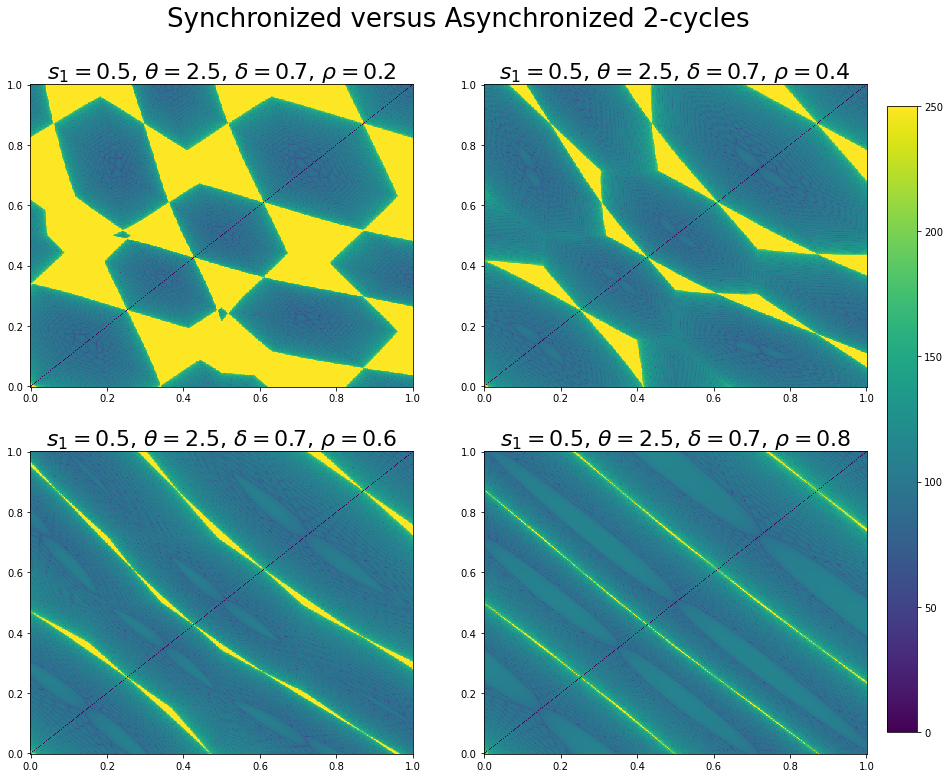

In [4]:
def plot_attraction_basis(s1=0.5, θ=2.5, δ=0.7, ρ=0.2, npts=250, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Create attraction basis
    unitrange = np.linspace(0, 1, npts)
    model = MSGSync(s1, θ, δ, ρ)
    ab = model.create_attraction_basis(npts=npts)
    cf = ax.pcolormesh(unitrange, unitrange, ab, cmap="viridis")

    return ab, cf


fig = plt.figure(figsize=(14, 12))

# Left - Bottom - Width - Height
ax0 = fig.add_axes((0.05, 0.475, 0.38, 0.35), label="axes0")
ax1 = fig.add_axes((0.5, 0.475, 0.38, 0.35), label="axes1")
ax2 = fig.add_axes((0.05, 0.05, 0.38, 0.35), label="axes2")
ax3 = fig.add_axes((0.5, 0.05, 0.38, 0.35), label="axes3")

params = [[0.5, 2.5, 0.7, 0.2],
          [0.5, 2.5, 0.7, 0.4],
          [0.5, 2.5, 0.7, 0.6],
          [0.5, 2.5, 0.7, 0.8]]

ab0, cf0 = plot_attraction_basis(*params[0], npts=500, ax=ax0)
ab1, cf1 = plot_attraction_basis(*params[1], npts=500, ax=ax1)
ab2, cf2 = plot_attraction_basis(*params[2], npts=500, ax=ax2)
ab3, cf3 = plot_attraction_basis(*params[3], npts=500, ax=ax3)

cbar_ax = fig.add_axes([0.9, 0.075, 0.03, 0.725])
plt.colorbar(cf0, cax=cbar_ax)

ax0.set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.2$",
              fontsize=22)
ax1.set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.4$",
              fontsize=22)
ax2.set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.6$",
              fontsize=22)
ax3.set_title(r"$s_1=0.5$, $\theta=2.5$, $\delta=0.7$, $\rho=0.8$",
              fontsize=22)

fig.suptitle("Synchronized versus Asynchronized 2-cycles",
             x=0.475, y=0.915, size=26)
plt.show()

Additionally, instead of just seeing 4 plots at once, we might want to
manually be able to change $\rho$ and see how it affects the plot
in real-time. Below we use an interactive plot to do this.

Note, interactive plotting requires the [ipywidgets](https://github.com/jupyter-widgets/ipywidgets) module to be installed and enabled.

In [5]:
def interact_attraction_basis(ρ=0.2, maxiter=250, npts=250):
    # Create the figure and axis that we will plot on
    fig, ax = plt.subplots(figsize=(12, 10))

    # Create model and attraction basis
    s1, θ, δ = 0.5, 2.5, 0.75
    model = MSGSync(s1, θ, δ, ρ)
    ab = model.create_attraction_basis(maxiter=maxiter, npts=npts)

    # Color map with colormesh
    unitrange = np.linspace(0, 1, npts)
    cf = ax.pcolormesh(unitrange, unitrange, ab, cmap="viridis")
    cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
    plt.colorbar(cf, cax=cbar_ax)
    plt.show()
    return None

In [6]:
fig = interact(interact_attraction_basis,
               ρ=(0.0, 1.0, 0.05),
               maxiter=(50, 5000, 50),
               npts=(25, 750, 25))

interactive(children=(FloatSlider(value=0.2, description='ρ', max=1.0, step=0.05), IntSlider(value=250, descri…

```{solution-end}
```